In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
MW = np.loadtxt("/content/drive/MyDrive/Courses/phy508/megawatt.dat")
N = len(MW)               #  one-year of MWatt values at 15-minute intervals
dt = 1./24./4.            # time interval in day units
t = np.linspace(0,N*dt,N) # time discretization in day units

fMW = fft(MW)[1:N//2]     # get fft & remove mirror & remove 0Hz 0 ... Np/2-1, Np/2 ... Np-1,
f = fftfreq(N,dt)[1:N//2] # args. are sample number, sample dt, & remove mirror & remove 0Hz
T = 1.0/f

print("data points, time interval, Nyquist freq, freq interval",N, dt, np.max(f), np.max(f)/(N/2))

data points, time interval, Nyquist freq, freq interval 35044 0.010416666666666666 47.99726058669103 0.002739256967623047


Text(0, 0.5, 'Period [days]')

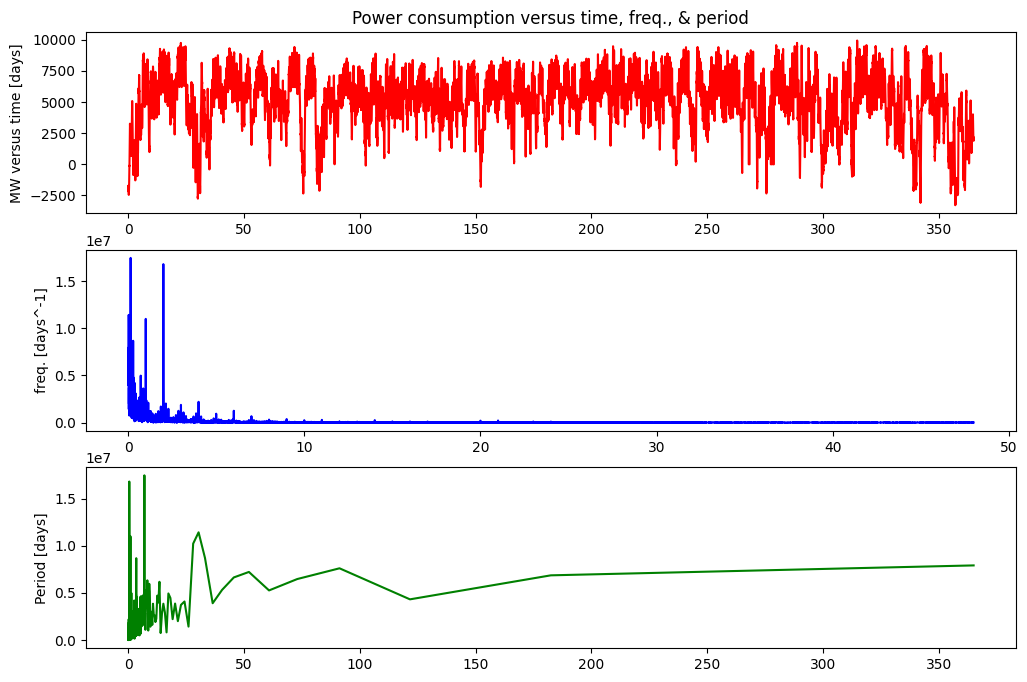

In [7]:

fig, ax = plt.subplots(3,figsize=(12,8))

ax[0].plot(t,MW,'r')
ax[0].set_title("Power consumption versus time, freq., & period")
ax[0].set_ylabel("MW versus time [days]")

ax[1].plot(f,np.abs(fMW),'b')   # magnitude of complex fy
ax[1].set_ylabel("freq. [days^-1]")

# example of 1 day, 1 week, 1day/1week harmonics, 1day/1week sidebands
#ax[1].set_xlim(0.0,2.2)

# example of higher harmonicsand sidebands
#ax[1].set_xlim(0.0,10.2)
#ax[1].set_yscale('log')

ax[2].plot(T,np.abs(fMW),'g')   # magnitude of complex fy
ax[2].set_ylabel("Period [days]")
#ax[2].set_xlim(0.,40.)
